In [1]:
from transformers import  CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


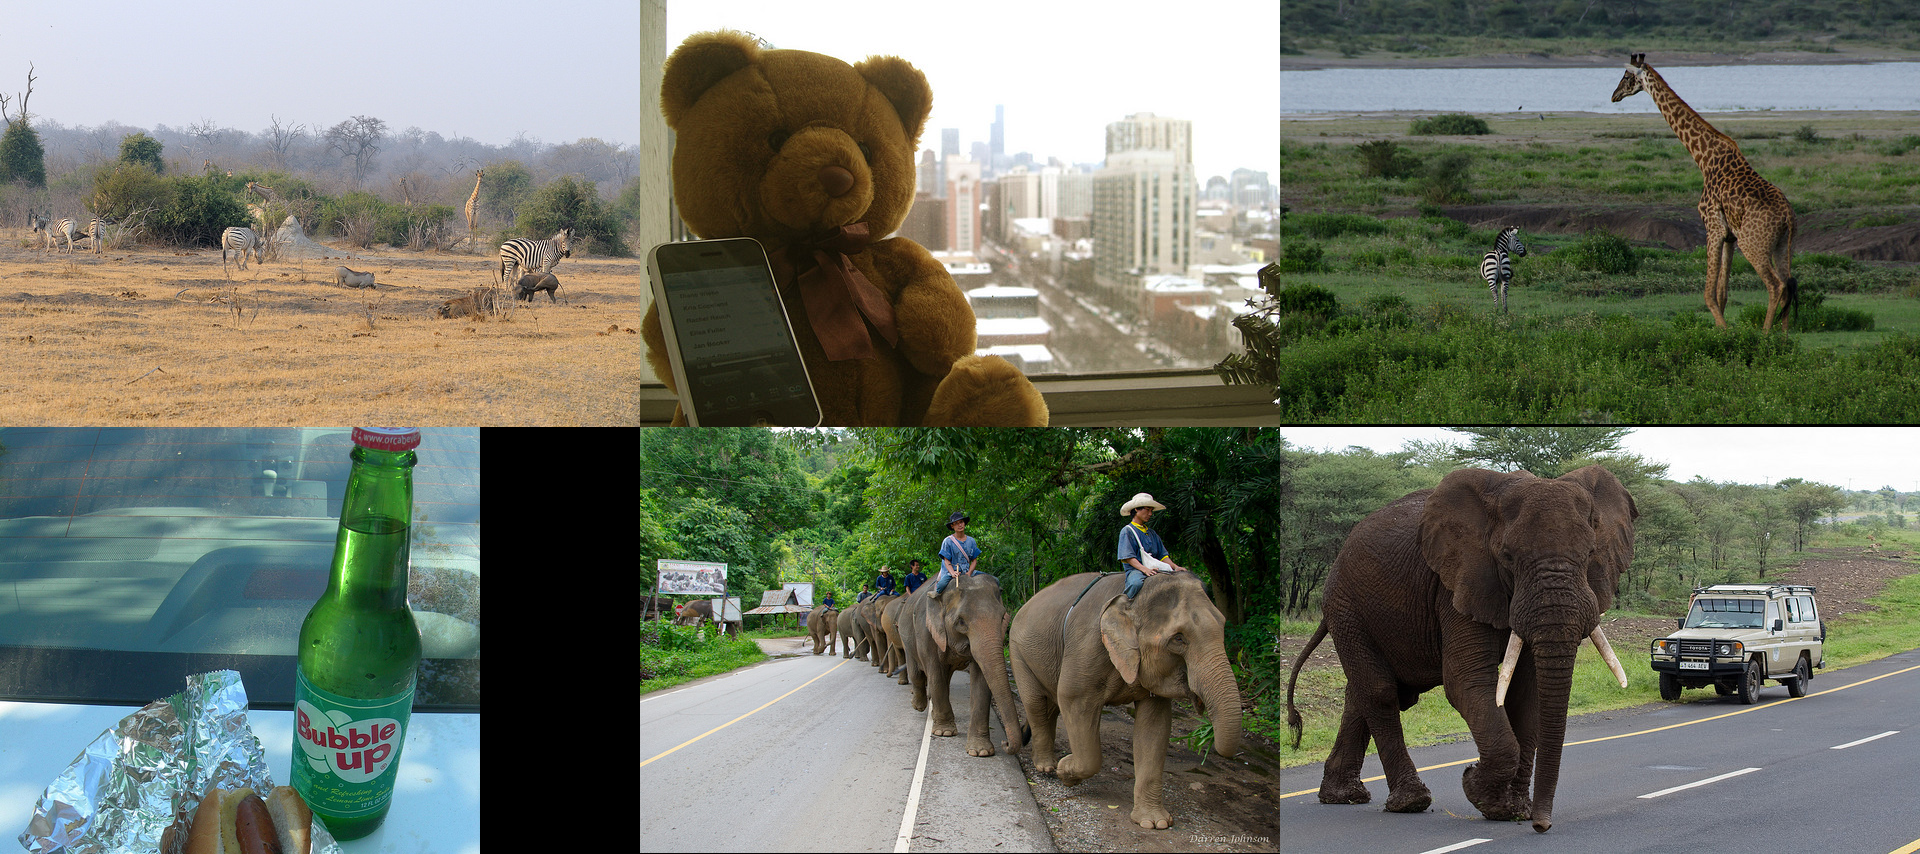

In [3]:
from PIL import Image
import os

def image_grid(imgs, cols):
      rows = (len(imgs) + cols - 1) // cols
      w, h = imgs[0].size
      grid = Image.new('RGB', size=(cols * w, rows * h))


      for i, img in enumerate(imgs):
                grid.paste(img, box=(i % cols * w, i // cols * h))

      return grid




image_folder = '/content/drive/MyDrive/Colab Notebooks/Computer_vision/images'
images = []
for filename in os.listdir(image_folder):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
       img_path = os.path.join(image_folder, filename)
       images.append(Image.open(img_path))



if images:
    grid = image_grid(images, cols=3)
    display(grid)



else:

    print("No images found in the directory")

















In [4]:
classes = ['giraffe', 'zebra','elephant','teddybear','hotdog']
inputs = processor(text=classes, images=images, return_tensors="pt", padding=True)
outputs = model(**inputs)



In [5]:
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)



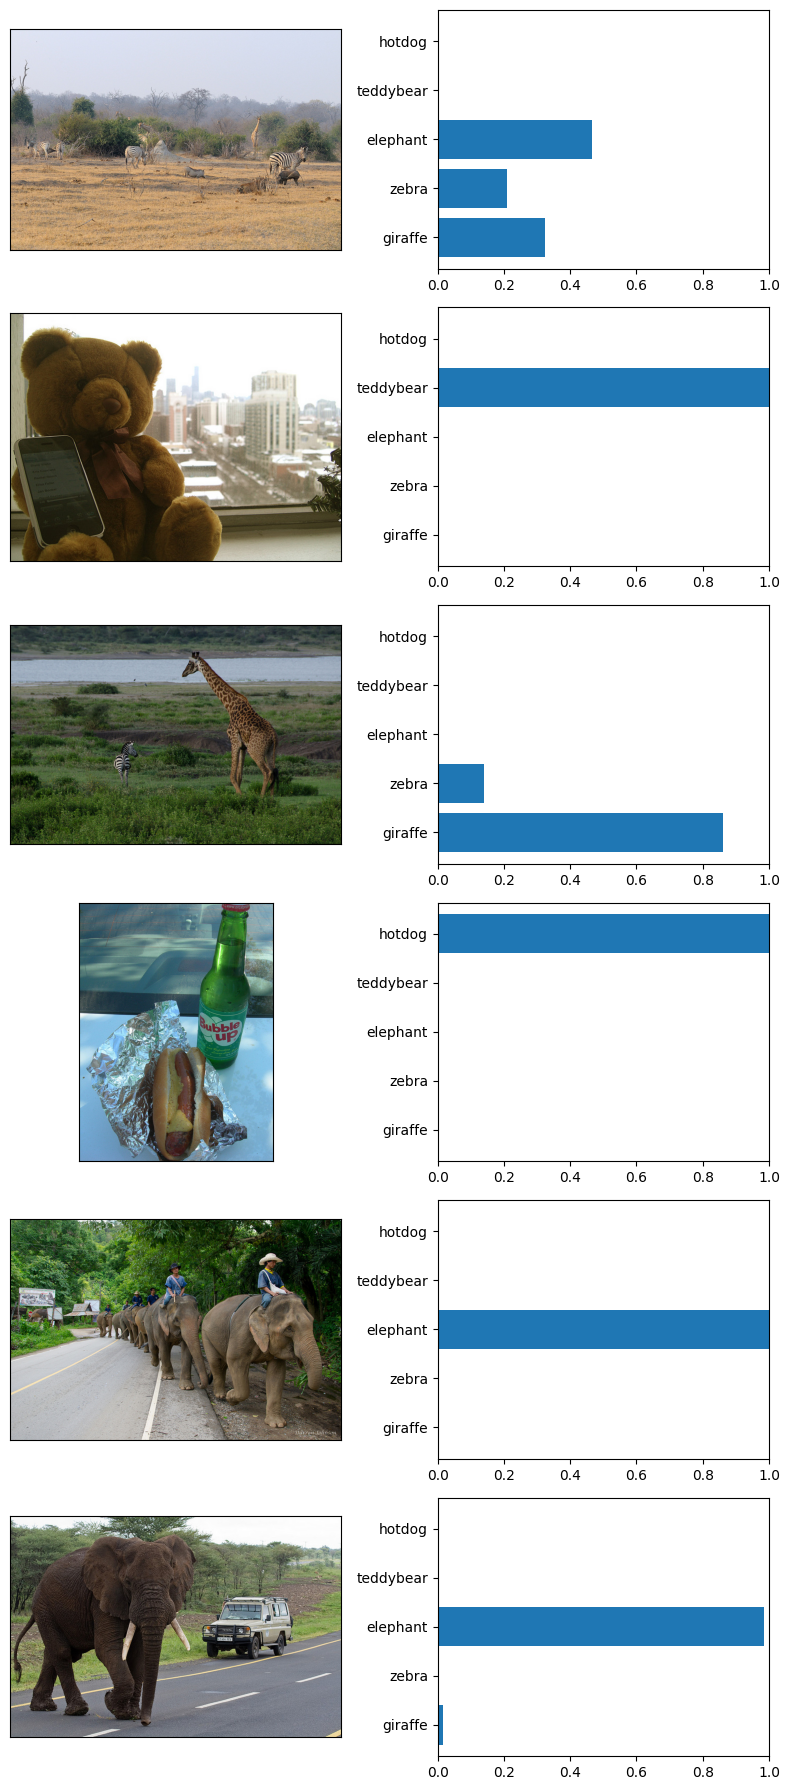

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, len(images) * 3))



for idx in range(len(images)):
  fig.add_subplot(len(images), 2, 2*(idx+1)-1)
  plt.imshow(images[idx])
  plt.xticks([])
  plt.yticks([])


  fig.add_subplot(len(images), 2, 2*(idx+1))
  plt.barh(range(len(probs[0].detach().numpy())), probs[idx].detach().numpy(), tick_label=classes)
  plt.xlim(0, 1.0)

plt.tight_layout()






